# Housing Price Prediction
**EDA & Feature enginnering **

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Feature Engineering

1) Problem statement.
This dataset comprises sample of house prices in the california region and also includes various features such as location, no of rooms, no of bedrooms, median age of the house etc. This data is used to build a model which will predict the price of a house. Prediction results can be used to give new house seller the price suggestion based on the model built.

2) Data Collection.
The Dataset is collected from kaggle website.
The data consists of 9 columns and 20640 rows.

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv("housing.csv", index_col=[0])

**Show Top 5 Records**

In [3]:
df.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,,,,,,,,,
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Shape of the dataset**

In [4]:
df.shape

(20640, 9)

**Summary of the dataset**

In [5]:
# Display summary statistics for a dataframe
df.describe()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Check Datatypes in the dataset**

In [6]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 20640 entries, -122.23 to -121.24
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            20640 non-null  float64
 1   housing_median_age  20640 non-null  float64
 2   total_rooms         20640 non-null  float64
 3   total_bedrooms      20433 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
 6   median_income       20640 non-null  float64
 7   median_house_value  20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.6+ MB


## 3. EXPLORING DATA

In [7]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

We have 1 categorical features : ['ocean_proximity']


### Feature Information
* **latitude:** latitude of the house location.
* **housing_median_age:** Median age of the house.
* **total_rooms:** No of rooms in the house.
* **total_bedrooms:** Total bedrooms in the house
* **population:** Population of the city in which the house is located.
* **households:** No of households in the city in which the house is located.
* **median_income:** Median income in the city in which the house is located.
* **median_house_value:** Median house value in the city in which the house is located.
* **ocean_proximity:** Distance of the house to the nearest ocean/sea/beach.

In [8]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: ocean_proximity, dtype: float64
---------------------------


## Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Report**  
* # The above query is just hanging , not giving any results
* 

### Categorical Features

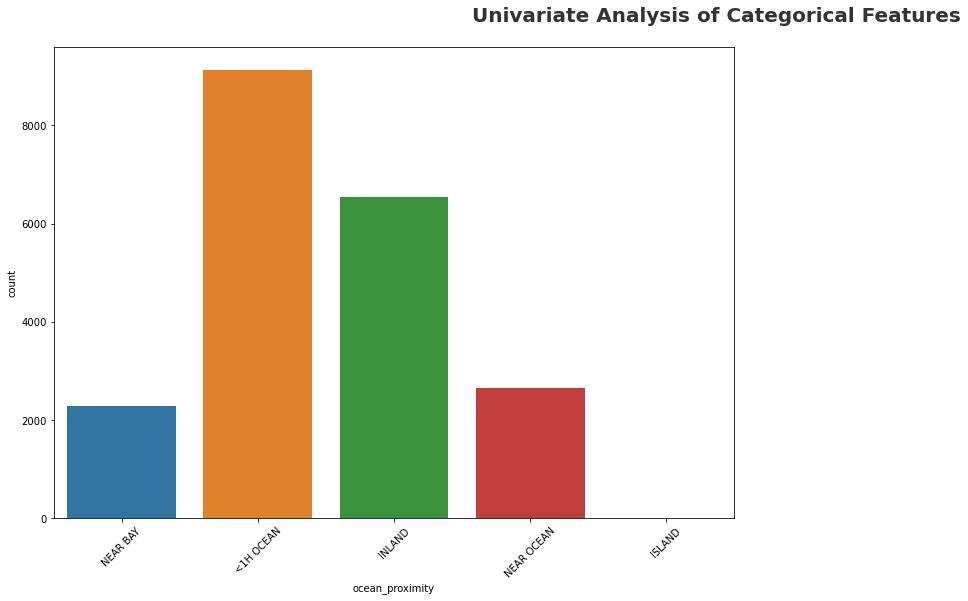

In [13]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'ocean_proximity']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

In [16]:
df[(list(df.columns)[1:])].corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


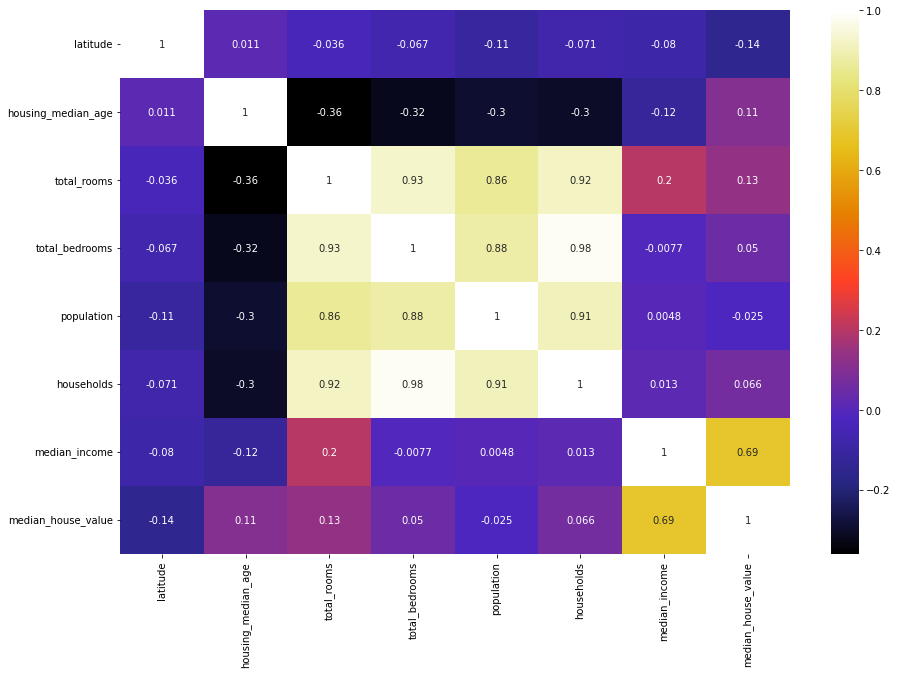

In [17]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

**Report** 
* Housing_median_age has negative correlation with total rooms.
* Households has negative correlation with Housing_median_age
* Population has positive correlation with total_rooms
* Households has positive correlation with total_rooms

### Check Multicollinearity for Categorical features

A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

A chi-square statistic is one way to show a relationship between two categorical variables.

Here we test correlation of Categorical columns with Target column i.e Selling Price

In [30]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['median_house_value'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,ocean_proximity,Reject Null Hypothesis


### Checking Null Values

In [31]:
df.isnull().sum()

latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [32]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


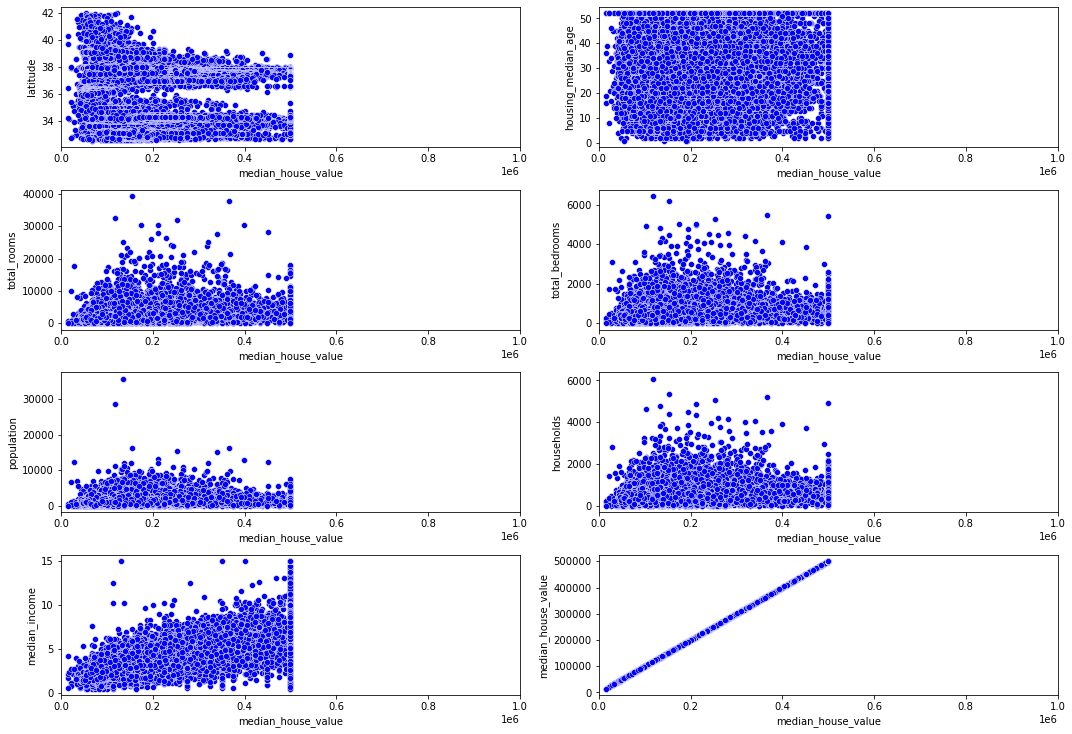

In [33]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='median_house_value', y=continues_features[i], color='b')
    plt.xlim(0,1000000) # Limit to 1 million dollars to view clean
    plt.tight_layout()

## Initial Analysis Report

Report

Population, Households, Median_house_value have outliers.

## 4. Visualization

### 4.1 Visualize the Target Feature

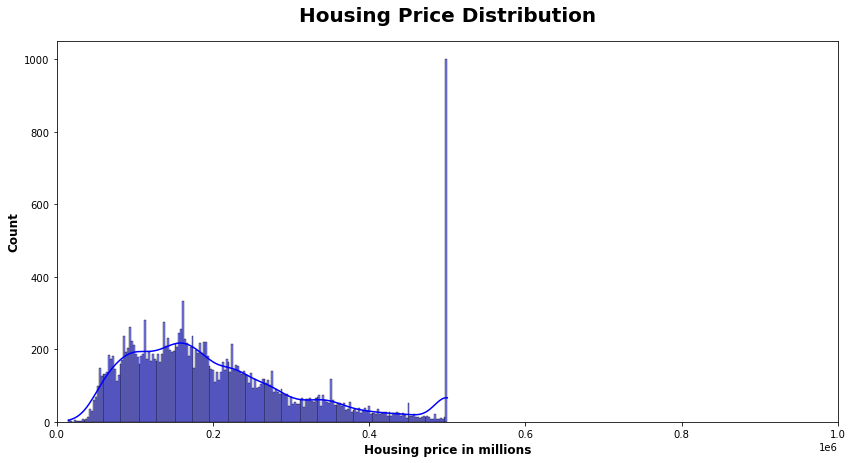

In [31]:
plt.subplots(figsize=(14,7))
sns.histplot(df.median_house_value, bins=200, kde=True, color = 'b')
plt.title("Housing Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Housing price in millions", weight="bold", fontsize=12)
plt.xlim(0,1000000)
plt.show()

* From the chart it is clear that the Target Variable Skewed

### 4.2 Most Sold house as per ocean proximity?

In [35]:
df.ocean_proximity.value_counts()[0:10]

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Most sold houses are near to 1H OCEAN ocean

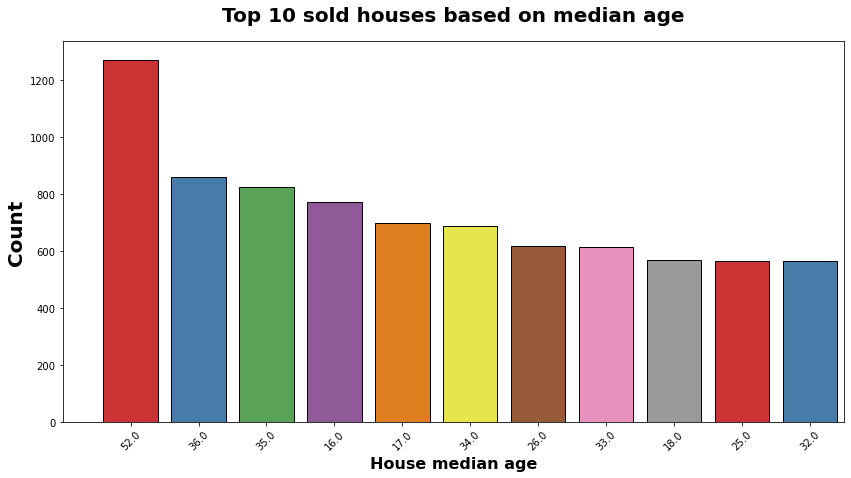

In [39]:
plt.subplots(figsize=(14,7))
sns.countplot(x="housing_median_age", data=df,ec = "black",palette="Set1",order = df['housing_median_age'].value_counts().index)
plt.title("Top 10 sold houses based on median age", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("House median age", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

### Check mean price of house whose median age is 52 which is most sold

In [42]:
i20 = df[df['housing_median_age'] == 52.0]['median_house_value'].mean()
print(f'The mean price of house with median age 52 is {i20:.2f} Dollars')

The mean price of house with median age 52 is 275420.87 Dollars


**Report:**
* As per the Chart these are top 10 most selling cars in used car website.
* Of the total cars sold Hyundai i20 shares 5.8% of total ads posted and followed by Maruti Swift Dzire.
* Mean Price of Most Sold Car is 5.4 lakhs.
* This Feature has impact on the Target Variable.

## Most selling house based on median income

In [52]:
df.median_income.value_counts()

3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: median_income, Length: 12928, dtype: int64

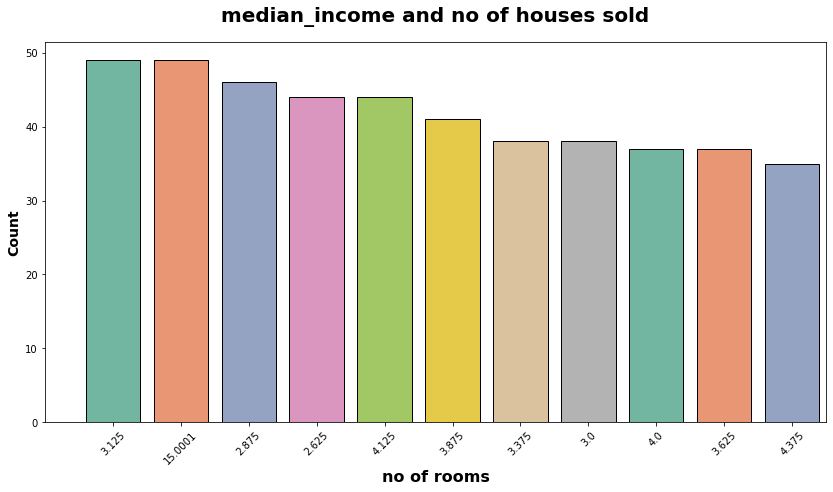

In [53]:
plt.subplots(figsize=(14,7))
sns.countplot(x="median_income", data=df,ec = "black",palette="Set2",order = df['median_income'].value_counts().index)
plt.title("median_income and no of houses sold", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("no of rooms", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

## Most selling house based on population

In [55]:
df.population.value_counts()

891.0     25
761.0     24
1227.0    24
1052.0    24
850.0     24
          ..
2141.0     1
5546.0     1
3186.0     1
3590.0     1
6912.0     1
Name: population, Length: 3888, dtype: int64

In [36]:
# ** Report
# Low populations have sold most no of houses
# High populations have lower no of houses sold

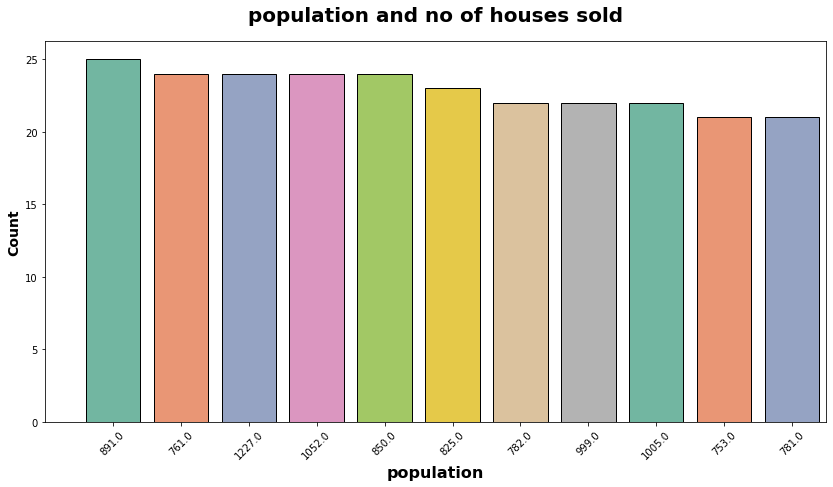

In [56]:
plt.subplots(figsize=(14,7))
sns.countplot(x="population", data=df,ec = "black",palette="Set2",order = df['population'].value_counts().index)
plt.title("population and no of houses sold", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("population", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [ ]:
## Most selling house based on households

In [57]:
df.households.value_counts()

306.0     57
386.0     56
335.0     56
282.0     55
429.0     54
          ..
2375.0     1
1133.0     1
2270.0     1
2528.0     1
1818.0     1
Name: households, Length: 1815, dtype: int64

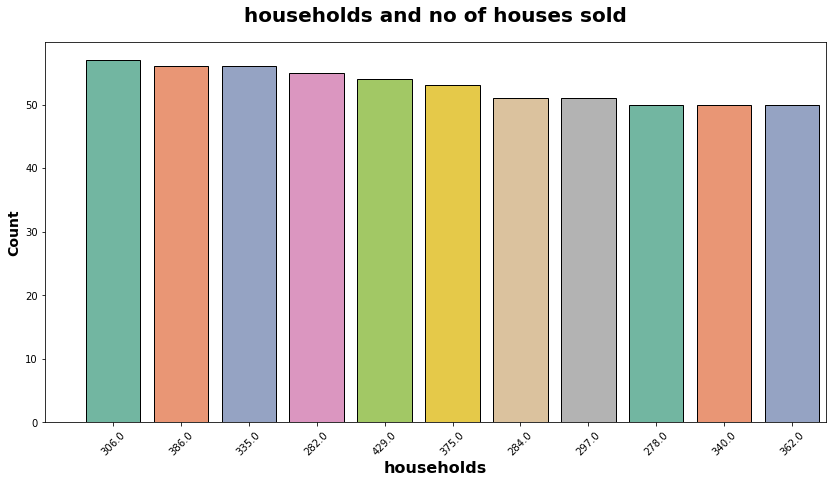

In [58]:
plt.subplots(figsize=(14,7))
sns.countplot(x="households", data=df,ec = "black",palette="Set2",order = df['households'].value_counts().index)
plt.title("households and no of houses sold", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("households", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

## Final Report

The data has errors in the columns total_rooms, total_bedrooms, as these columns are showing total rooms like 800 , 1000 etc

Number of houses sold and population have negative relationship

Number of houses sold and number of households have negative relationship

No of houses sold is almost same for all the median ages for houses except for median age 52.

1H OCEAN (near to beach) has most number of houses sold compared to other oceans